# Data Analysis Project

### About Aquastat
AQUASTAT collects, analyses and disseminates data and information, by country, on water resources, water use and agricultural water management, with emphasis on irrigated agriculture in Africa, Asia, Latin America, and the Caribbean. Its goal is to support agricultural and rural development through sustainable use of water and land by providing the most accurate information presented in a consistent and standard way.

AQUASTAT is an important source of data for several international organizations ranging from UN agencies to NGOs, from private companies to governmental bodies, all of which produce information related to water and agriculture, in particular, water resources and water management.

### About the Dataset
The AQUASTAT core database provides the platform for organizing and presenting over 180 variables and indicators on water resources and their use which include water withdrawal, wastewater, pressure on water resources, irrigation and drainage, and few components on environment and health. They can be searched and extracted, along with their metadata, for 200+ countries and for different regions over an extensive time period (from 1960 to 2017).

The current database regroups data per 5-year period and shows for each variable the value for the most recent year during that period, if available. It can be queried in three languages (English, French and Spanish) on the following main categories:

- land use: total area, arable land and permanent crops
- population: total, urban and rural
- conventional water resources: surface water and groundwater
- non-conventional sources of water: wastewater, desalinated water and fossil water
- water withdrawal by sector: agricultural, domestic and industrial
- water withdrawal by source: surface water, groundwater and non-conventional water
- irrigation potential
- area under irrigation or agricultural water management
- irrigation techniques: surface, sprinkler and localized drained areas
- irrigated crops: area and yield

I have chosen the English version of the dataset and it comes in an Excel format. Each row represents a specific indicator (e.g., access to safe drinking water, water usage), for a country in a specific year, with the associated value and unit.

| Column | Description |
| --- | --- |
| VariableGroup | Thematic category (e.g., Environment and Health) |
| Subgroup | Subcategory of the variable (e.g., Access to improved drinking water source) |
| Variable | Full name of the metric being measured |
| Area | Country or Region |
| Year | Year of Data |
| Value | Measured value (e.g., percentage, cubic meters) |
| Unit | Unit of measurement (e.g., %, m³) |
| Symbol | Metadata marker (e.g., estimated, interpolated) |
| IsAggregate | Whether the data is a regional aggregate (True/False) |

### Simulating Shareholder Questions
I will use ChatGPT to simulate typical stakeholder questions that would be asked of a Data Analyst of this dataset. Below is its response:
> You're a junior data analyst working in a water policy research unit. You've been given the AQUASTAT dataset to extract meaningful insights on water access, usage, and infrastructure across countries over time. You've already demonstrated competency with Python and visualizations in a previous climate-related analysis.

#### A screenshot of the response from ChatGPT
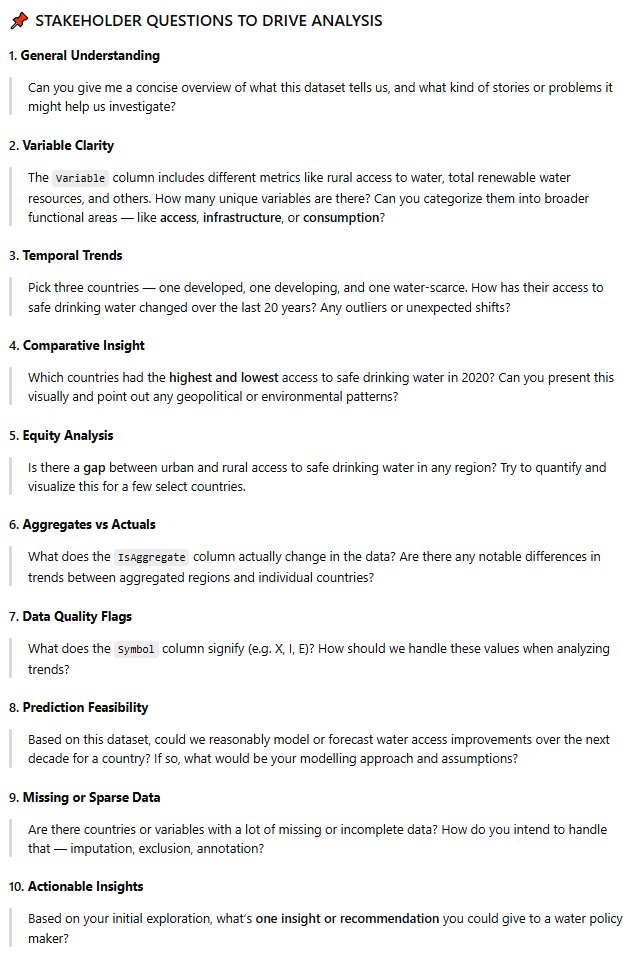

From these, I have selected 5 questions and slightly edited them to use in my to analysis report: 

1. General Understanding
Can you give me a concise overview of what this dataset tells us, and what kind of stories or problems it might help us investigate?

2. Temporal Trends
Pick three countries — one developed, one developing, and one water-scarce. How has their access to safe drinking water changed over time? Any outliers or unexpected shifts?

3. Relationship between the trends
Investigate the relationship between a dependent variable and one or more independent variables - Can you use the insights gained to make predictions? How do the variables relate to one another? 

4. Prediction Feasibility
Based on this dataset, could we reasonably model or forecast water access improvements over the next decade for a country? If so, what would be your modelling approach and assumptions?

5. Actionable Insights
Based on your initial exploration, what’s one insight or recommendation you could give to a water policy maker?

### Project Aims
To address the stakeholders’ questions, I will use tools offered by relevant Python libraries to explore and understand what the dataset is that we are dealing with. I will later, apply more advanced techniques to extrapolate future trends in existing data in order to, assess the capabilities of the dataset. Finally, given all of the data, it may be possible to offer honest recommendations to a water policy maker on how to manage the water resources of a country more effectively.

## Tackling question's one and two


### Pandas API
Pandas is an open-source Python library with powerful and built-in methods to efficiently clean, analyze, and manipulate datasets. Developed by Wes McKinney in 2008, this powerful package can easily blend with various other data science modules in Python.

Pandas is built on top of the NumPy library, i.e., its data structures Series and DataFrame are the upgraded versions of NumPy arrays.

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas conveniently provides a function to read and save excel files. 

### Dataset Pre-analysis

In [234]:
dataset = pd.read_excel("C:/Users/ms742/DataAnalysisProject/AQUASTAT Dataset.xlsx") # Using Pandas to load the dataset directly from an Excel file.

In [235]:
dataset.info() # Function that prints metadata about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VariableGroup  50000 non-null  object 
 1   Subgroup       50000 non-null  object 
 2   Variable       50000 non-null  object 
 3   Area           50000 non-null  object 
 4   Year           50000 non-null  int64  
 5   Value          50000 non-null  float64
 6   Unit           43041 non-null  object 
 7   Symbol         50000 non-null  object 
 8   IsAggregate    50000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 3.1+ MB


Here are the first 10 rows of the dataset. The dataset is vertically sorted by the subgroup and variable and then every area or country is grouped together in ascending order of year.

In [237]:
dataset.head(10)

,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
0,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2012,43.7,%,X,False
1,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2013,45.4,%,X,False
2,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2014,47.0,%,X,False
3,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2015,47.0,%,X,False
4,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2016,47.0,%,I,False
5,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2017,47.0,%,I,False
6,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2018,47.0,%,I,False
7,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2019,47.0,%,I,False
8,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2020,47.0,%,I,False
9,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2021,47.0,%,I,False


In [238]:
dataset.info() # Function retrieves technical info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VariableGroup  50000 non-null  object 
 1   Subgroup       50000 non-null  object 
 2   Variable       50000 non-null  object 
 3   Area           50000 non-null  object 
 4   Year           50000 non-null  int64  
 5   Value          50000 non-null  float64
 6   Unit           43041 non-null  object 
 7   Symbol         50000 non-null  object 
 8   IsAggregate    50000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 3.1+ MB


All of the entries listed as 'object' are character strings. The symbol 'I' means imputed, 'X' means external and 'E' means estimate. This indicates how the information was sourced. For the purposes of this project the symbol column shall be discarded and the isAggregate column also. 'isAggregate' is true if the area is a combination of multiple countries or regions such as 'South-east Asia'. A selection few countries shall be included in the cleaned dataset not regions; therefore the isAggregate is not necessary.

### Dataset Filtering & Cleaning

Pandas provides extensive tools of dataset manipulation. I can use it to select all records from a single country. In this case 'Afghanistan'.

In [242]:
dataset_afghanistan = dataset[dataset["Area"] == "Afghanistan"]

In [243]:
dataset_afghanistan

,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
0,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2012,43.700000,%,X,False
1,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2013,45.400000,%,X,False
2,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2014,47.000000,%,X,False
3,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2015,47.000000,%,X,False
4,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2016,47.000000,%,I,False
...,...,...,...,...,...,...,...,...,...
49875,Irrigation and drainage development,Area equipped for irrigation by source of water,% of area equipped for irrigation by groundwater,Afghanistan,2017,17.992519,%,I,False
49876,Irrigation and drainage development,Area equipped for irrigation by source of water,% of area equipped for irrigation by groundwater,Afghanistan,2018,17.992519,%,I,False
49877,Irrigation and drainage development,Area equipped for irrigation by source of water,% of area equipped for irrigation by groundwater,Afghanistan,2019,17.992519,%,I,False
49878,Irrigation and drainage development,Area equipped for irrigation by source of water,% of area equipped for irrigation by groundwater,Afghanistan,2020,17.992519,%,I,False


Only the rows with the 'Area' = 'Afghanistan' are shown.

For the purposes of this dataset I shall include 30 countries. Countries are selected for no particular reason.

In [245]:
# All the countries I want to include in a set.
countries = {"Afghanistan", "Mongolia", "Iraq", "Italy", "Slovenia", "Tunisia", "France", "Bolivia", "Sudan", "Egypt", "Japan", "Burkina Faso", "Kenya", "Syria", "Azerbaijan", "Mexico", "Norway", "Türkiye", "Philipines", "Austrailia", "Russia", "Argentina", "Zambia", "Jamaica", "Finland", "Oman", "Brazil", "Nepal", "Vietnam", "Switzerland"}

print(len(countries))

30


In [246]:
# Include every row whose Area matches a string in the countries set.
dataset_filtered = dataset[dataset["Area"].isin(countries)]

In [247]:
dataset_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6218 entries, 0 to 49979
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VariableGroup  6218 non-null   object 
 1   Subgroup       6218 non-null   object 
 2   Variable       6218 non-null   object 
 3   Area           6218 non-null   object 
 4   Year           6218 non-null   int64  
 5   Value          6218 non-null   float64
 6   Unit           5286 non-null   object 
 7   Symbol         6218 non-null   object 
 8   IsAggregate    6218 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 443.3+ KB


In [248]:
dataset_filtered['Area'].nunique() # Confirming that there are 30 countries in the dataset.

24

Initially, this returns 24 countries instead of the 30 it should give. To troubleshoot this, I will try printing every single unique country name.

In [250]:
# Loop to add a country's name to a list if it is unique.

for column in dataset_filtered.columns:
    if column == 'VariableGroup':
        unique_values = dataset_filtered["Area"].unique()
        print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'VariableGroup': ['Afghanistan' 'Argentina' 'Azerbaijan' 'Brazil' 'Burkina Faso' 'Egypt'
 'Finland' 'France' 'Iraq' 'Italy' 'Jamaica' 'Japan' 'Kenya' 'Mexico'
 'Mongolia' 'Nepal' 'Norway' 'Oman' 'Slovenia' 'Sudan' 'Switzerland'
 'Tunisia' 'Türkiye' 'Zambia']


In [251]:
# Bolivia (Plurinational State of), Syrian Arab Republic, Philippines, Russian Federation, Viet Nam, and Australia. Were misspelled.

countries = {"Afghanistan", "Mongolia", "Iraq", "Italy", "Slovenia", "Tunisia", "France", "Bolivia (Plurinational State of)", "Sudan", "Egypt", "Japan", "Burkina Faso", "Kenya", "Syrian Arab Republic", "Azerbaijan", "Mexico", "Norway", "Türkiye", "Philippines", "Australia", "Russian Federation", "Argentina", "Zambia", "Jamaica", "Finland", "Oman", "Brazil", "Nepal", "Viet Nam", "Switzerland"}

dataset_filtered = dataset[dataset["Area"].isin(countries)]

dataset_filtered['Area'].nunique()

30

The error has been rectified, now the unneccsary columns shall be pruned.

In [253]:
dataset_filtered.drop(columns=['Symbol', 'IsAggregate'], inplace=True)

C:\Users\ms742\AppData\Local\Temp\ipykernel_1760\30301263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered.drop(columns=['Symbol', 'IsAggregate'], inplace=True)


In [254]:
dataset_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7892 entries, 0 to 49979
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VariableGroup  7892 non-null   object 
 1   Subgroup       7892 non-null   object 
 2   Variable       7892 non-null   object 
 3   Area           7892 non-null   object 
 4   Year           7892 non-null   int64  
 5   Value          7892 non-null   float64
 6   Unit           6726 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 493.2+ KB


### Can you give me a concise overview of what this dataset tells us, and what kind of stories or problems it might help us investigate?

This dataset provides a wealth of data on health, resource, economic & population metrics for countries across the globe. This could help us to investigate the relationship between resources such as water or arable land and the economy or on the relationship between the urban population and the GDP for example. A data analyst or scientist could use those metrics to predict future trends of developing countries or patterns to indicate the right 'ingredients' for a successful economy.

In the next phase of this project, I will be selecting some metrics and analysing the relationship they have with each other.

## Preliminary Dataset Analysis

I will be examining four statistics in the dataset access to safe drinking water, arable land, GDP per capita and undernourishment. This analysis will rank the statistics by descending order for each of the 30 countries. 

#### Total population with access to safe drinking-water

Consider the water scarcity in each country, I will calculate the mean access to water for every country for every year from the filtered dataset.

In [260]:
# Filter the dataset for rows where 'Variable' is 'Access to safe drinking water'
water_access_dataset = dataset_filtered[dataset_filtered["Variable"] == "Total population with access to safe drinking-water (JMP)"]

In [261]:
# Group by 'Area' and calculate the mean of 'Value'
mean_access_to_water = water_access_dataset.groupby("Area")["Value"].mean()

In [262]:
# Displaying Results
mean_access_to_water.sort_values(ascending=False, inplace=True) # Pandas library function for sorting series.

In [263]:
mean_access_to_water

Area
Switzerland                         100.00
Australia                           100.00
Finland                             100.00
France                              100.00
Norway                              100.00
Italy                               100.00
Japan                               100.00
Türkiye                              99.93
Slovenia                             99.50
Egypt                                99.29
Argentina                            99.00
Brazil                               98.01
Tunisia                              97.58
Russian Federation                   96.86
Viet Nam                             96.85
Mexico                               95.95
Jamaica                              93.80
Oman                                 93.38
Philippines                          91.60
Nepal                                91.06
Syrian Arab Republic                 90.10
Bolivia (Plurinational State of)     89.77
Iraq                                 86.54
Azerba

mean_access_to_water.plot()

Here it is, visualised in bar chart format.

<Axes: xlabel='Area', ylabel='Total Population Access to Water %'>

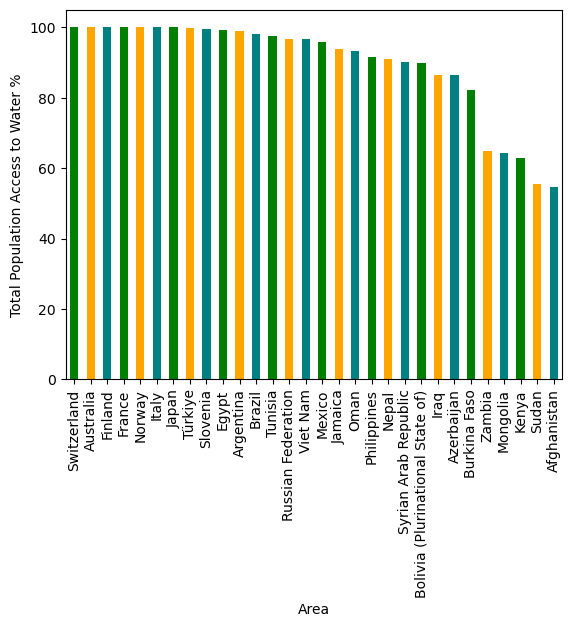

In [266]:
mean_access_to_water.plot.bar(xlabel='Area', ylabel='Total Population Access to Water %', color=['green','orange','teal'])

The same process of data analysis will be repeated for Arable land area, Prevalence of undernourishment and GDP per capita.

#### Peak Arable land area

In [269]:
# Filter the dataset for rows where 'Variable' is 'Arable land'
arable_land_dataset = dataset_filtered[dataset_filtered["Variable"] == "Arable land area"]

# Group by 'Area' and calculate the maximum of 'Value'
max_arable_land_area = arable_land_dataset.groupby("Area")["Value"].max()

# Displaying Results
max_arable_land_area.sort_values(ascending=False, inplace=True) # Pandas library function for sorting series.

In [270]:
max_arable_land_area

Area
Russian Federation                  121649.0000
Brazil                               58252.7600
Argentina                            42208.7597
Australia                            31960.3000
Mexico                               22552.0000
Sudan                                20994.8400
Türkiye                              20699.0000
France                               18478.7000
Afghanistan                           7829.0000
Italy                                 7199.4140
Viet Nam                              7002.8000
Burkina Faso                          6100.0000
Kenya                                 5800.0000
Philippines                           5590.0000
Iraq                                  4969.0000
Bolivia (Plurinational State of)      4868.3672
Syrian Arab Republic                  4668.4500
Japan                                 4246.0000
Zambia                                3800.0000
Egypt                                 3365.0000
Tunisia                            

<Axes: xlabel='Area', ylabel='Mean Arable Land (1000ha)'>

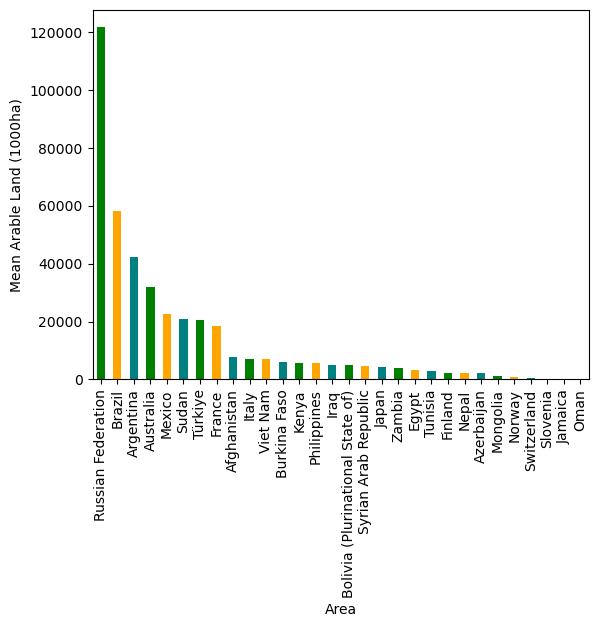

In [271]:
max_arable_land_area.plot.bar(xlabel='Area', ylabel='Mean Arable Land (1000ha)', color=['green','orange','teal'])

#### Prevalence of undernourishment


In [273]:
# Filter the dataset for rows where 'Variable' is 'Prevalence of undernourishment'
undernourishment_dataset = dataset_filtered[dataset_filtered["Variable"] == "Prevalence of undernourishment (3-year average)"]

# Group by 'Area' and calculate the mean of 'Value'
prevalence_of_undernourishment = undernourishment_dataset.groupby("Area")["Value"].mean()

# Displaying Results
prevalence_of_undernourishment.sort_values(ascending=False, inplace=True) # Pandas library function for sorting series.

In [274]:
prevalence_of_undernourishment

Area
Zambia                              33.21
Afghanistan                         22.77
Kenya                               20.81
Iraq                                16.69
Bolivia (Plurinational State of)    16.04
Syrian Arab Republic                14.20
Burkina Faso                        13.89
Sudan                               11.38
Philippines                          8.48
Mongolia                             8.26
Jamaica                              7.49
Viet Nam                             6.87
Nepal                                6.37
Egypt                                5.80
Oman                                 5.15
Mexico                               3.99
Argentina                            3.14
Tunisia                              2.87
Brazil                               2.83
Japan                                2.70
Russian Federation                   2.60
Azerbaijan                           2.50
Name: Value, dtype: float64

<Axes: xlabel='Area', ylabel='Prevalence Of Undernourishment %'>

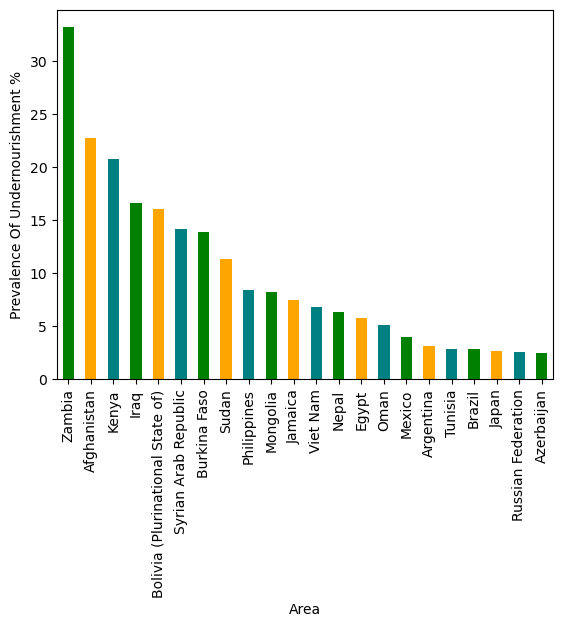

In [275]:
prevalence_of_undernourishment.plot.bar(xlabel='Area', ylabel='Prevalence Of Undernourishment %', color=['green','orange','teal'])

#### GDP per capita

In [277]:
# Filter the dataset for rows where 'Variable' is 'Prevalence of undernourishment'
GDP_per_capita_dataset = dataset_filtered[dataset_filtered["Variable"] == "GDP per capita"]

# Group by 'Area' and calculate the mean of 'Value'
mean_GDP_per_capita = GDP_per_capita_dataset.groupby("Area")["Value"].mean()

# Displaying Results
mean_GDP_per_capita.sort_values(ascending=False, inplace=True) # Pandas library function for sorting series.

In [278]:
mean_GDP_per_capita

Area
Switzerland                         86790.644733
Norway                              83620.797496
Australia                           59804.341873
Finland                             48232.820195
France                              42163.672576
Japan                               40208.014877
Italy                               33641.545654
Slovenia                            24113.441148
Oman                                20030.689348
Argentina                           12500.070320
Russian Federation                  12010.068161
Türkiye                             10500.195235
Mexico                               9908.360674
Brazil                               9632.475169
Azerbaijan                           5481.283868
Iraq                                 5287.380230
Jamaica                              5218.655703
Mongolia                             4146.589717
Tunisia                              3842.077253
Bolivia (Plurinational State of)     3106.528706
Philippines    

<Axes: xlabel='Area', ylabel='Prevalence Of Undernourishment %'>

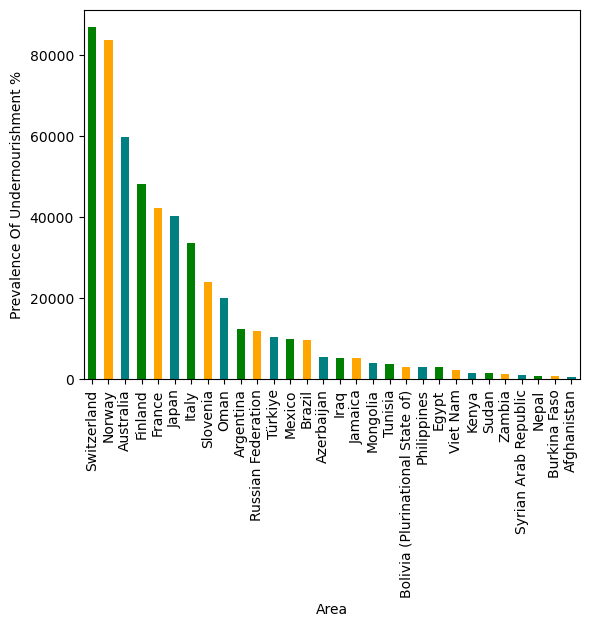

In [279]:
mean_GDP_per_capita.plot.bar(xlabel='Area', ylabel='Prevalence Of Undernourishment %', color=['green','orange','teal'])

## What relationships are there between the data we have investigated?

### Comparing correlations between data points

I will be investigating the correlation between arable land and water scarcity. This is done using a scatterplot from the matplotlib library.

In [283]:
merged_data_water_arable = pd.merge(water_access_dataset, arable_land_dataset, on=["Area", "Year"]) # Merging the arable land and water scarcity filtered datasets from earlier.

In [284]:
merged_data_water_arable

,VariableGroup_x,Subgroup_x,Variable_x,Area,Year,Value_x,Unit_x,VariableGroup_y,Subgroup_y,Variable_y,Value_y,Unit_y
0,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2012,51.6,%,Geography and population,Land use,Arable land area,7790.0,1000 ha
1,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2013,53.4,%,Geography and population,Land use,Arable land area,7785.0,1000 ha
2,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2014,55.2,%,Geography and population,Land use,Arable land area,7771.0,1000 ha
3,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2015,55.3,%,Geography and population,Land use,Arable land area,7765.0,1000 ha
4,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2016,55.3,%,Geography and population,Land use,Arable land area,7729.0,1000 ha
...,...,...,...,...,...,...,...,...,...,...,...,...
295,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Zambia,2017,65.4,%,Geography and population,Land use,Arable land area,3800.0,1000 ha
296,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Zambia,2018,65.4,%,Geography and population,Land use,Arable land area,3800.0,1000 ha
297,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Zambia,2019,65.4,%,Geography and population,Land use,Arable land area,3800.0,1000 ha
298,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Zambia,2020,65.4,%,Geography and population,Land use,Arable land area,3800.0,1000 ha


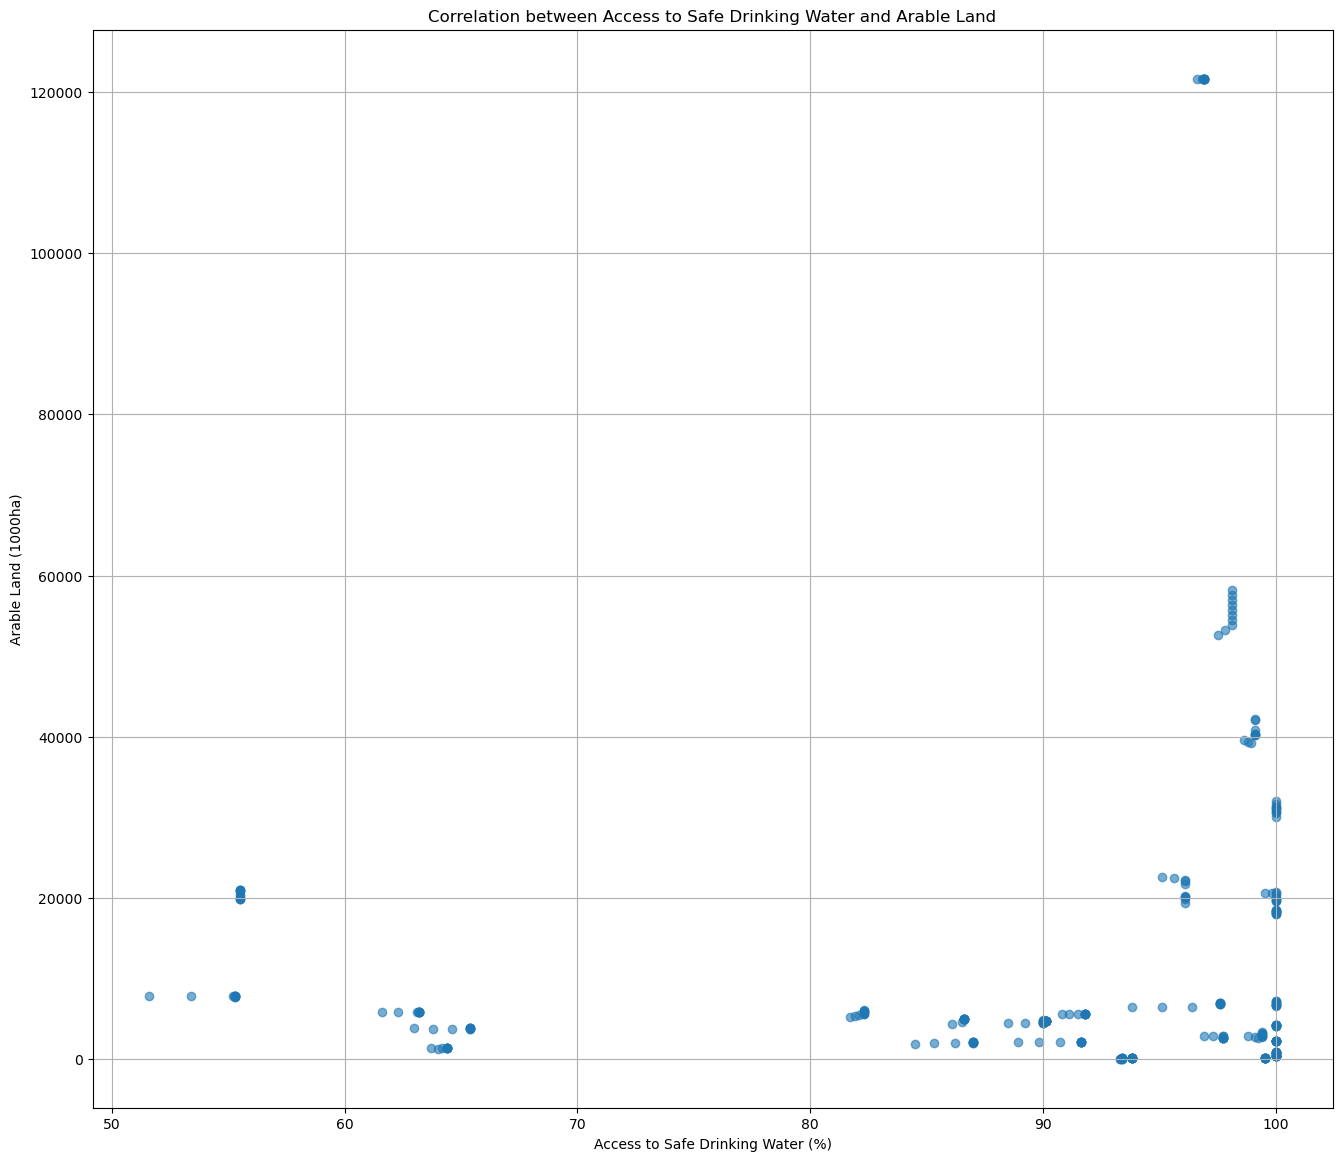

In [285]:
plt.figure(figsize=(16, 14)) # Size of graph
plt.scatter(merged_data_water_arable["Value_x"], merged_data_water_arable["Value_y"], alpha=0.6) # The values selected are from the previous datasets

plt.title('Correlation between Access to Safe Drinking Water and Arable Land')
plt.xlabel('Access to Safe Drinking Water (%)')
plt.ylabel('Arable Land (1000ha)')
plt.grid(True)

#### Analysis of the correlation

There isn't any real correlation between arable land and access to drinking water, the vast majority of countries are of a smaller size, they have under 20000 (in 1000s of hectacres) of arable land. However, it is interesting to note that all the large countries with a lot of arable land have good access to water. That is because the largest countries in the world have the greatest economies and they tend to control territory with large diverse biomes; this increases the likelihood of their land containing rivers, lakes, and water reservoirs. It is usually smaller to mid-sized countries around the equator that suffer from lack of clean water.

#### Correlation between GDP per capita & Undernourishment

The expected outcome of comparing GDP per capita and undernourishment is that of an inverse correlation between undernourishment and GDP. Simply put, the wealthier the citizens are the less likely that, they have problems accessing food. 

In [289]:
merged_data_GDP_undernourishment = pd.merge(GDP_per_capita_dataset, undernourishment_dataset, on=["Area", "Year"]) # Merging the GDP per capita and prevalence of undernourishment filtered datasets from earlier.

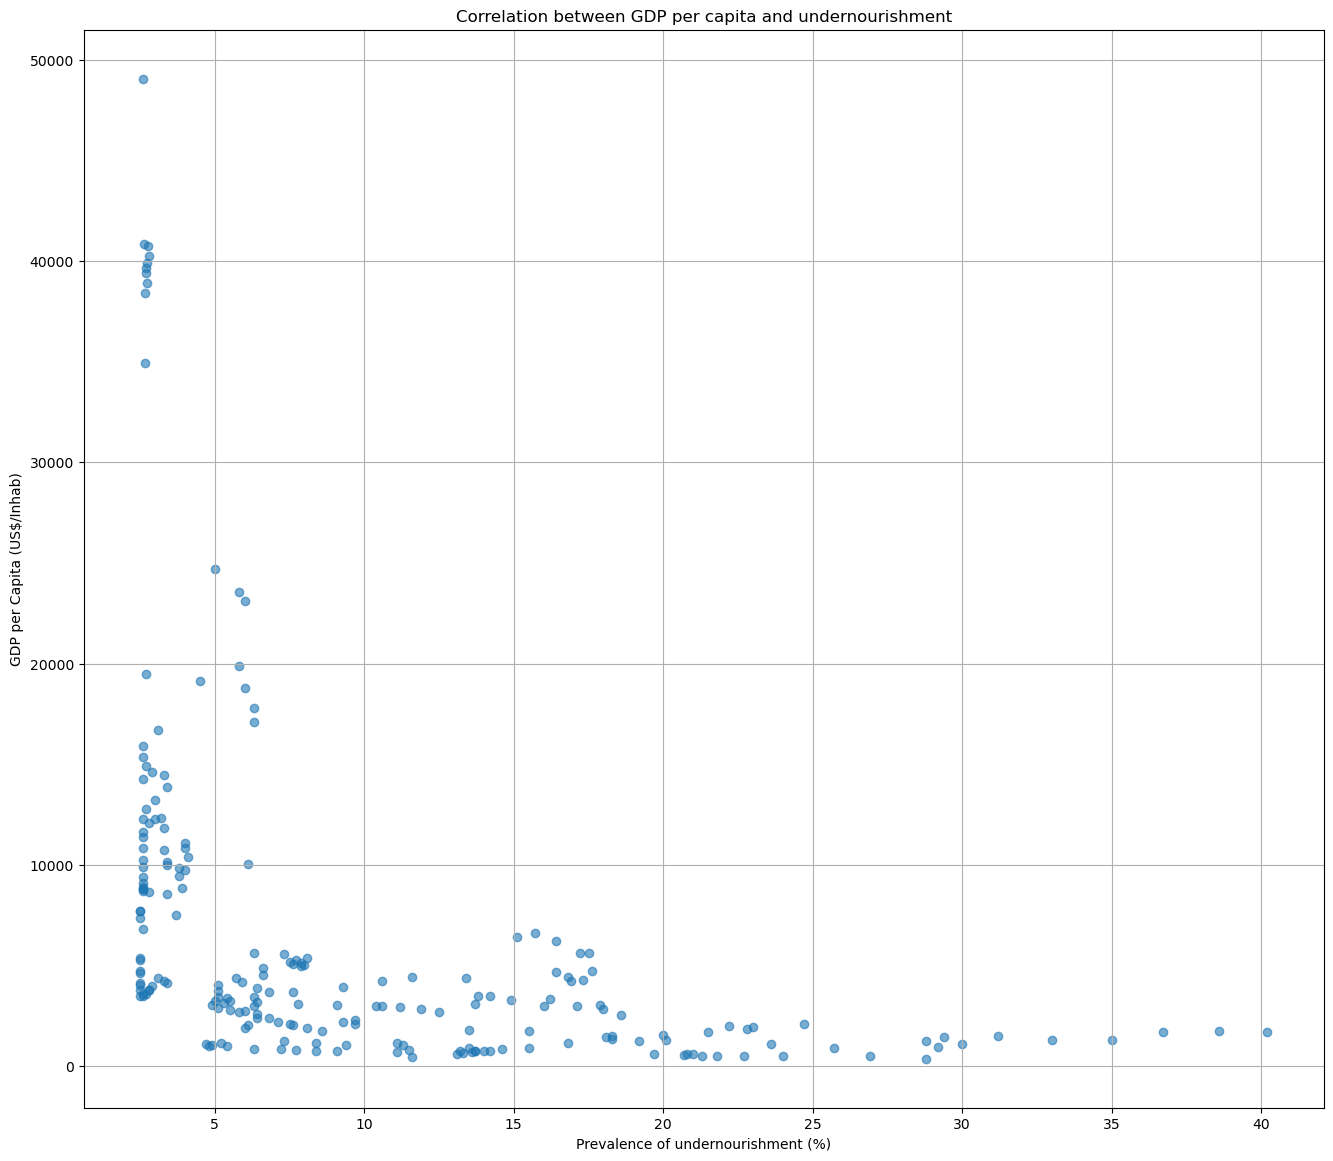

In [290]:
plt.figure(figsize=(16, 14)) # Size of graph
plt.scatter(merged_data_GDP_undernourishment["Value_y"], merged_data_GDP_undernourishment["Value_x"], alpha=0.6) # The values selected are from the previous datasets

plt.title('Correlation between GDP per capita and undernourishment')
plt.xlabel('Prevalence of undernourishment (%)')
plt.ylabel('GDP per Capita (US$/Inhab)')
plt.grid(True)

# Graph below of the correlation between GDP per capita and prevalence of undernourishment.

#### Analysis of the correlation
The results of the scatter graph clearly supports my hypothesis. To add to that, above a GDP per capita of approximately $10000 dollars per inhabitant the prevalence of undernourishment doesn't exceed 5%.

### Correlation between GDP per capita & agricultural value added to GDP

Now, I will be considering a statistic not used so far in this project. Agricultural value added to GDP as a percentage, the question I will try to answer is the relationship between GDP per capita and the percentage of a countries economy agriculture contributes to. 

In [294]:
# Extracting the new data for every country.
# Filter the dataset for rows where 'Variable' is 'Agriculture, value added (% GDP)'
agriculture_value_added_dataset = dataset_filtered[dataset_filtered["Variable"] == "Agriculture, value added (% GDP)"]

# Group by 'Area' and calculate the mean of 'Value'
agriculture_value_added = agriculture_value_added_dataset.groupby("Area")["Value"].mean()

In [295]:
merged_data_GDP_and_agricultural_GDP = pd.merge(GDP_per_capita_dataset, agriculture_value_added_dataset, on=["Area", "Year"]) # Merging the GDP per capita and agriculture as added GDP to the economy filtered datasets from earlier.

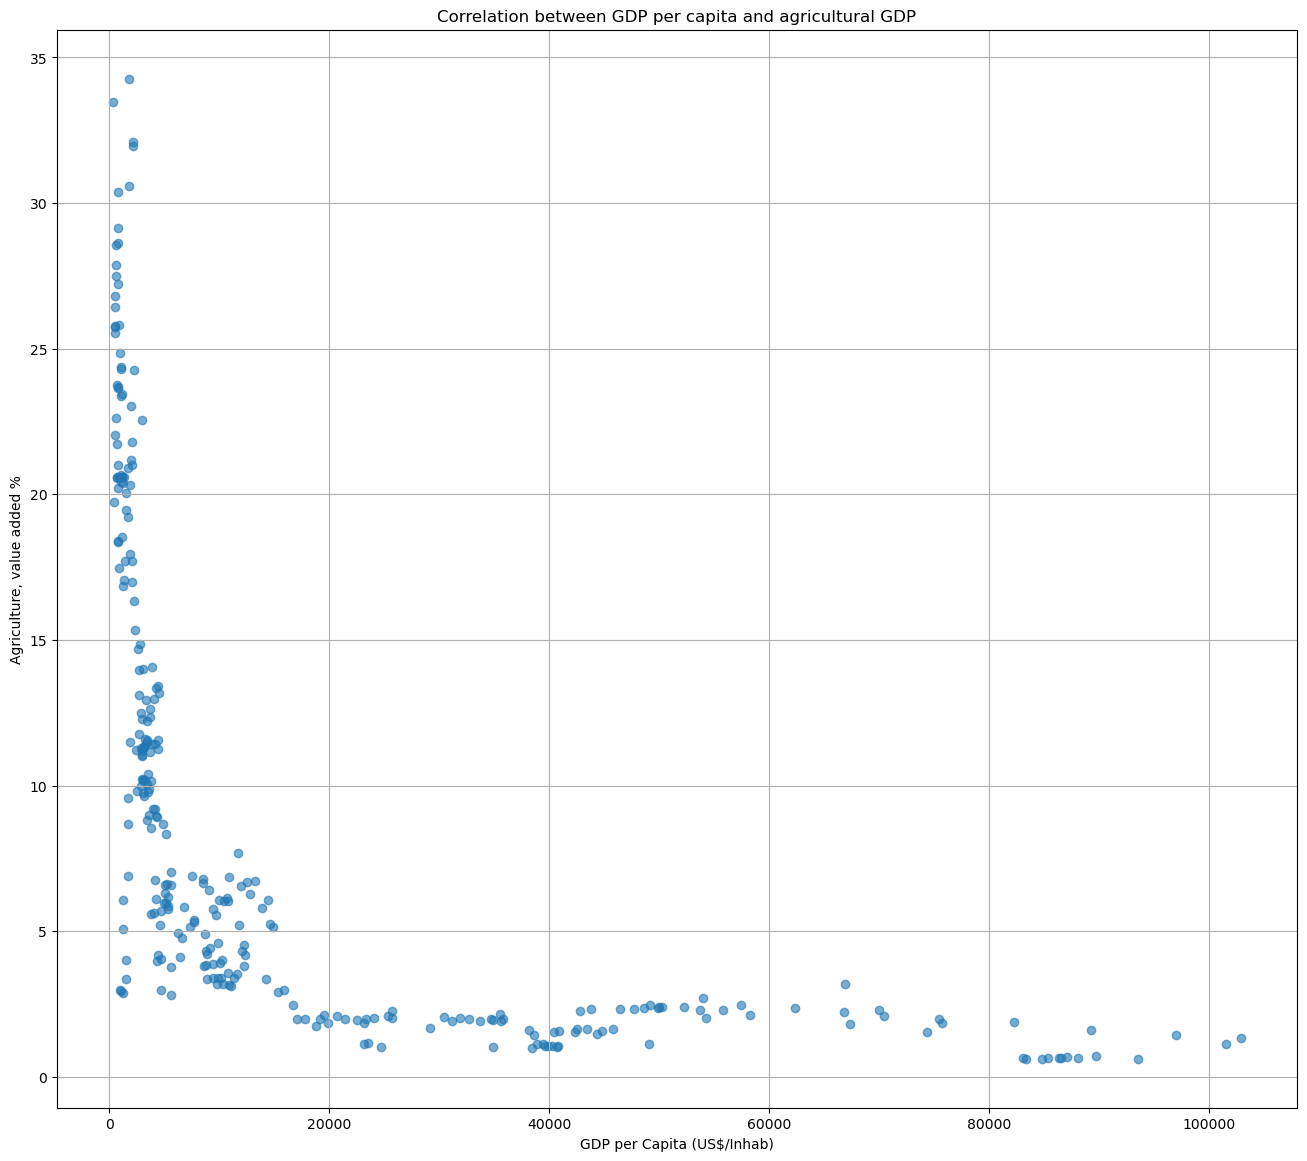

In [296]:
plt.figure(figsize=(16, 14)) # Size of graph
plt.scatter(merged_data_GDP_and_agricultural_GDP["Value_x"], merged_data_GDP_and_agricultural_GDP["Value_y"], alpha=0.6) # The values selected are from the previous datasets

plt.title('Correlation between GDP per capita and agricultural GDP')
plt.xlabel('GDP per Capita (US$/Inhab)')
plt.ylabel('Agriculture, value added %')
plt.grid(True)

#### Analysis of the correlation
There is trend indicating that countries whose economies are more dominated by agriculture tend to have lower GDP per capitas. The drop is incredibly sharp with no outliers. GDP only picks up when agriculture contributes less than 5% to the GDP. Around the 5% to 10% range some countries slightly deviate from the hard trend. Though the correlation is strong, it is non-linear.  

### Three countries — one developed, one developing, and one water-scarce. How has their access to safe drinking water changed over time? Any outliers or unexpected shifts?

An example of a developed country, I will select France. Kenya is selected as a developing country on track to becoming developed. Afghanistan is the example for a water-scarce country.

#### Developed Country

In [301]:
france_water_access = dataset_filtered[
    (dataset_filtered["Area"] == "France") &
    (dataset_filtered["Variable"] == "Total population with access to safe drinking-water (JMP)")
]

In [302]:
france_water_access

,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit
2530,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2012,100.0,%
2531,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2013,100.0,%
2532,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2014,100.0,%
2533,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2015,100.0,%
2534,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2016,100.0,%
2535,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2017,100.0,%
2536,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2018,100.0,%
2537,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2019,100.0,%
2538,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2020,100.0,%
2539,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,France,2021,100.0,%


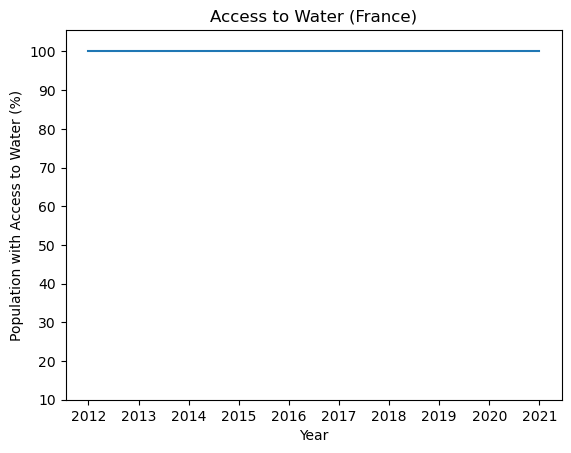

In [303]:
plt.plot(france_water_access["Year"], france_water_access["Value"])
plt.xlabel("Year") # Text for X-Axis
plt.ylabel("Population with Access to Water (%)") # Text for Y-Axis
plt.title("Access to Water (France)")
plt.yticks([10,20,30,40,50,60,70,80,90,100])
plt.xticks([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.show()

#### Developing Country

In [305]:
kenya_water_access = dataset_filtered[
    (dataset_filtered["Area"] == "Kenya") &
    (dataset_filtered["Variable"] == "Total population with access to safe drinking-water (JMP)")
]

In [306]:
kenya_water_access

,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit
2800,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2012,61.6,%
2801,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2013,62.3,%
2802,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2014,63.1,%
2803,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2015,63.2,%
2804,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2016,63.2,%
2805,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2017,63.2,%
2806,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2018,63.2,%
2807,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2019,63.2,%
2808,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2020,63.2,%
2809,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Kenya,2021,63.2,%


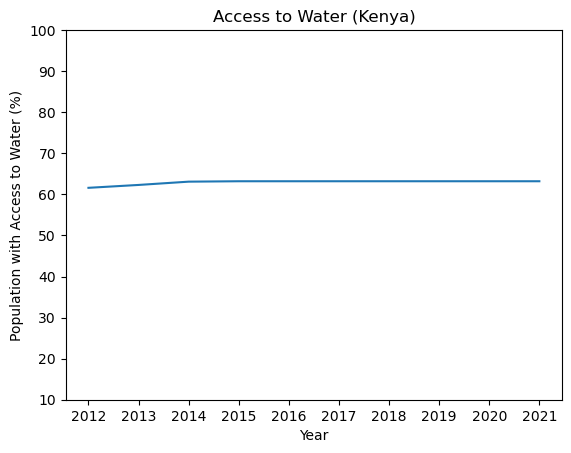

In [307]:
plt.plot(kenya_water_access["Year"], kenya_water_access["Value"])
plt.xlabel("Year") # Text for X-Axis
plt.ylabel("Population with Access to Water (%)") # Text for Y-Axis
plt.title("Access to Water (Kenya)")
plt.yticks([10,20,30,40,50,60,70,80,90,100])
plt.xticks([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.show()

#### Water Scarce Country

In [309]:
afghanistan_water_access = dataset_filtered[
    (dataset_filtered["Area"] == "Afghanistan") &
    (dataset_filtered["Variable"] == "Total population with access to safe drinking-water (JMP)")
]

In [310]:
afghanistan_water_access

,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit
1920,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2012,51.6,%
1921,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2013,53.4,%
1922,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2014,55.2,%
1923,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2015,55.3,%
1924,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2016,55.3,%
1925,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2017,55.3,%
1926,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2018,55.3,%
1927,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2019,55.3,%
1928,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2020,55.3,%
1929,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2021,55.3,%


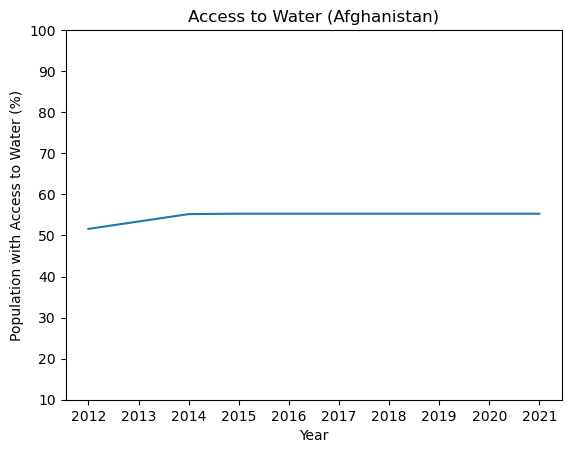

In [311]:
plt.plot(afghanistan_water_access["Year"], afghanistan_water_access["Value"])
plt.xlabel("Year") # Text for X-Axis
plt.ylabel("Population with Access to Water (%)") # Text for Y-Axis
plt.title("Access to Water (Afghanistan)")
plt.yticks([10,20,30,40,50,60,70,80,90,100])
plt.xticks([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.show()

#### Conclusion
By using Python and Matplotlib, I can visualise what this dataset has to tell us and I can also determine what special trends or relationships there are in the dataset. I have described what is what is in the dataset and also performed bivariate analysis. For the next section, I will be using all that I have learned to perform regression analysis and to answer the next question posed.

## Tackling question three

#### Regression Analysis

Investigate the relationship between a dependent variable and one or more independent variables - Can you use the insights gained to make predictions? How do the variables relate to one another? 

In this section, I will perform regression analysis to explore the relationship between a dependent variable and multiple independent variables, and to assess whether these insights can be used to make predictions. Specifically, I will analyze how three key statistics relate to one another. Instead of using total arable land, I will substitute it with the percentage contribution of agriculture to a country's total GDP. This analysis is based on a filtered dataset comprising 30 countries, where each data point represents the average values from the years 2012 to 2021.

In [314]:
import statsmodels.api as sm
import seaborn as sns

In [315]:
# Firstly, all datasets will have their value column renamed.

GDP_per_capita_dataset = GDP_per_capita_dataset.rename(columns={"Value": "GDP per capita (US$/Inhab)"})

undernourishment_dataset = undernourishment_dataset.rename(columns={"Value": "Prev.. of Undernourishment %"})

agriculture_value_added_dataset = agriculture_value_added_dataset.rename(columns={"Value": "GDP, Agricultural value added %"})

water_access_dataset = water_access_dataset.rename(columns={"Value": "Clean Water Access %"})

In [316]:
# All of the data must be merged into one dataset.
combined_variables = pd.merge(GDP_per_capita_dataset[['Area', 'Year', 'GDP per capita (US$/Inhab)']], undernourishment_dataset[['Area', 'Year', 'Prev.. of Undernourishment %']], on=["Area", "Year"])
combined_variables = pd.merge(combined_variables, water_access_dataset[['Area', 'Year', 'Clean Water Access %']], on=["Area", "Year"])
combined_variables = pd.merge(combined_variables, agriculture_value_added_dataset[['Area', 'Year', 'GDP, Agricultural value added %']], on=["Area", "Year"])

# Only the three relevant columns frome each dataset are selected. A series of merge commands merge all four datasets into one big one.
# This is necessary because pd.merge can only handle two datasets at a time.

In [317]:
combined_variables.head() # Let's view the dataset to see if it works.

,Area,Year,GDP per capita (US$/Inhab),Prev.. of Undernourishment %,Clean Water Access %,"GDP, Agricultural value added %"
0,Afghanistan,2012,628.116539,19.7,51.6,28.556142
1,Afghanistan,2013,622.100518,21.0,53.4,27.878117
2,Afghanistan,2014,597.584579,20.8,55.2,27.479097
3,Afghanistan,2015,554.403216,20.7,55.3,25.532218
4,Afghanistan,2016,520.252064,21.3,55.3,25.740314


In [318]:
# Labelling the independent variables X and the dependent variables Y.
x = combined_variables[['Prev.. of Undernourishment %', 'GDP per capita (US$/Inhab)', 'Clean Water Access %']]

y = combined_variables['GDP, Agricultural value added %']

In [319]:
# Must include a constant to account for the intercept in the regression model.
x = sm.add_constant(x)

In [320]:
# Fit the regression model
model = sm.OLS(y, x).fit()

In [321]:
# Display the model summary
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     GDP, Agricultural value added %   R-squared:                       0.469
Model:                                         OLS   Adj. R-squared:                  0.462
Method:                              Least Squares   F-statistic:                     63.60
Date:                             Fri, 06 Jun 2025   Prob (F-statistic):           1.64e-29
Time:                                     19:19:28   Log-Likelihood:                -710.69
No. Observations:                              220   AIC:                             1429.
Df Residuals:                                  216   BIC:                             1443.
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
                                   coef    std err          t      P>|t|      [0

Below is the implementation of regression graphs for every independent to dependent variable relationship.

In [323]:
# Define predictor variables and target variable
predictor_vars = ['Prev.. of Undernourishment %', 'Clean Water Access %', 'GDP, Agricultural value added %']
target_var = 'GDP per capita (US$/Inhab)'

# Add constant to predictor variables for intercept
x = combined_variables[predictor_vars]
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(combined_variables[target_var], x).fit()

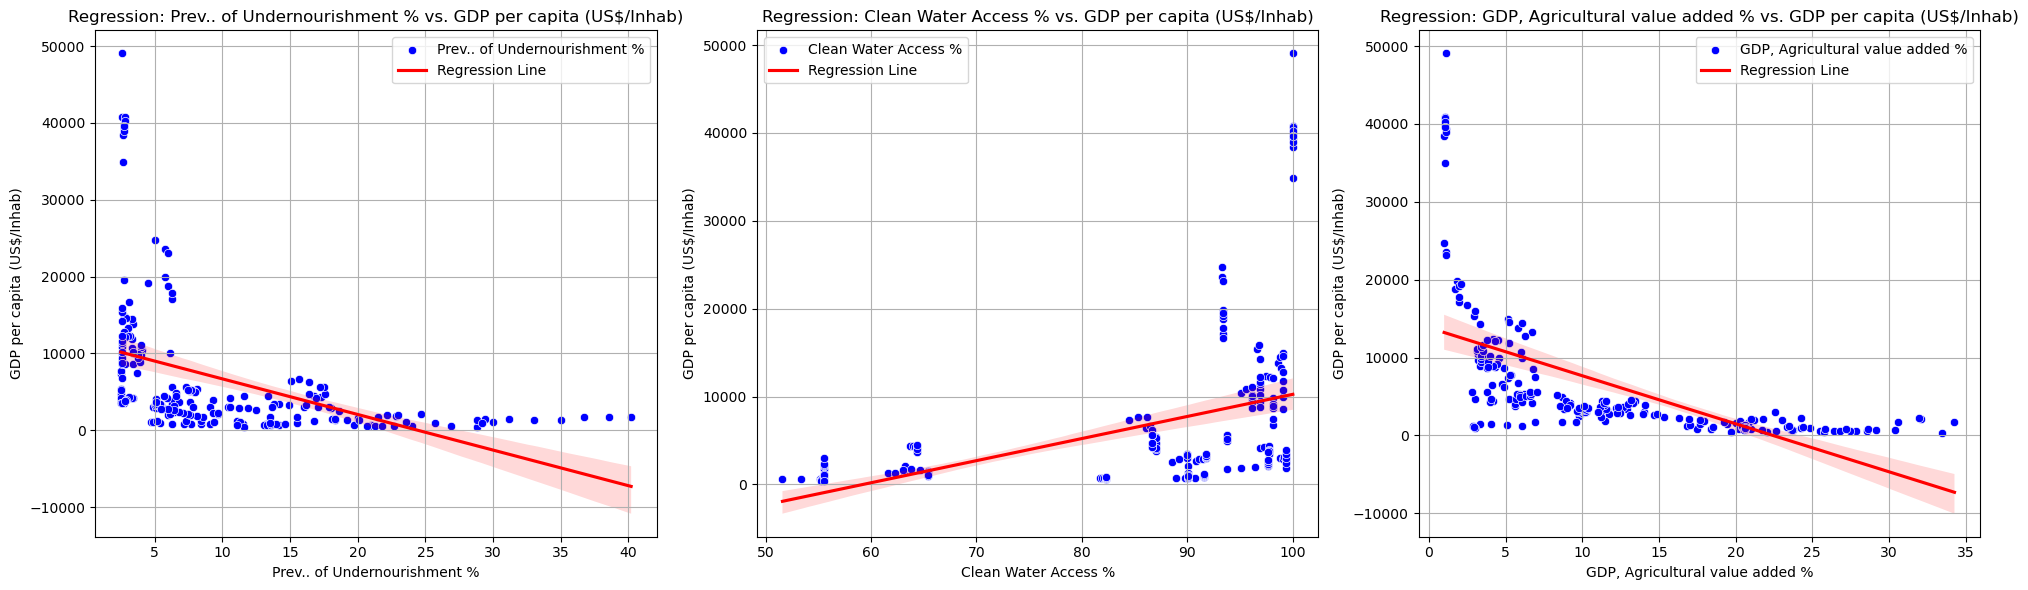

In [324]:
# Plotting against GDP per capita (US$/Inhab)
fig, axes = plt.subplots(nrows=1, ncols=len(predictor_vars), figsize=(20, 6))

for i, var in enumerate(predictor_vars):
    sns.scatterplot(x=combined_variables[var], y=combined_variables[target_var], ax=axes[i], color='blue', label=f'{var}')
    sns.regplot(x=combined_variables[var], y=combined_variables[target_var], scatter=False, ax=axes[i], color='red', label='Regression Line')
    axes[i].set_title(f'Regression: {var} vs. {target_var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target_var)
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()

#### Summary of Plot and Findings

The regression lines follow a trend in every pattern but not very closely when the GDP drops low enough. This can be explained by real world factors and by the limited number of countries in the dataset.

### Machine Learning Models

The aim of this section is to test the possibility of using machine learning as a tool to predict GDP per capita of a country from the values of undernourishment, access to clean water and total population. We have already discovered that undernourishment and access to clean water negatively correlate with GDP per capita so, theoretically, a model should be able to discern a strong relationship and make accurate predictions. 

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [330]:
# Prepare data for modeling
X = combined_variables[predictor_vars]
y = combined_variables[target_var]

In [331]:
# Split the dataset 80/20:24/6 countries training set/test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [332]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [333]:
# Make predictions
y_pred = model.predict(x_test)

R-squared is a value from 0 to 1 that explains how much the variability in the output variable can be explained by the input variables that the model used. Mean squared error is the average of squared differences between predicted and actual values. It is useful for when we have extreme unexpected values.

In [335]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 76941159.36
R-squared (R2): 0.36


#### Evaluating the Model

### Analysing the Trend over Time for Afghanistan

I was able to filter for 'Area' is Afghanistan previously to create a brand new smaller dataset. I will now use that dataset to compare temporal trends in Afghanistan for some major statistics. I will analyse the 